# Insurance Charges Prediction

## Project Overview

This project focuses on predicting the **insurance charges** of individuals based on various features such as **age**, **bmi**, **smoker status**, **region**, and others. The goal is to apply machine learning techniques, including **data preprocessing**, **feature engineering**, and **model evaluation**, to build a predictive model. We explore both **Linear Regression** and **Polynomial Regression** models to compare performance and understand the impact of different approaches on prediction accuracy.

## Nolan Moss
## 4/16/2025

## Section 1. Import and Inspect the Data


In [119]:
# Imports
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import root_mean_squared_error, mean_absolute_error, r2_score


from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PolynomialFeatures


In [120]:
# 1.1 Load the dataset and display the first 10 rows.
insurance_ds = pd.read_csv("data/insurance.csv")
print("First 10 rows of the dataset:")
print(insurance_ds.head(10))

# 1.2 Check for missing values and display summary statistics.
print("\nMissing values in each column:")
print(insurance_ds.isnull().sum())

print("\nSummary statistics for numerical columns:")
print(insurance_ds.describe())

First 10 rows of the dataset:
   age     sex     bmi  children smoker     region      charges
0   19  female  27.900         0    yes  southwest  16884.92400
1   18    male  33.770         1     no  southeast   1725.55230
2   28    male  33.000         3     no  southeast   4449.46200
3   33    male  22.705         0     no  northwest  21984.47061
4   32    male  28.880         0     no  northwest   3866.85520
5   31  female  25.740         0     no  southeast   3756.62160
6   46  female  33.440         1     no  southeast   8240.58960
7   37  female  27.740         3     no  northwest   7281.50560
8   37    male  29.830         2     no  northeast   6406.41070
9   60  female  25.840         0     no  northwest  28923.13692

Missing values in each column:
age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

Summary statistics for numerical columns:
               age          bmi     children       charges
count  1338.000000  1

Reflection 1: What do you notice about the dataset? Are there any data issues?

The data looks excellent, there are no missing values throughout the dataset. It's extracting some interesting and potentially valuable features from the insurance.csv file that will be useful for the assessment. Notable features include: children, BMI, age, and smoker.

## Section 2. Data Exploration and Preparation


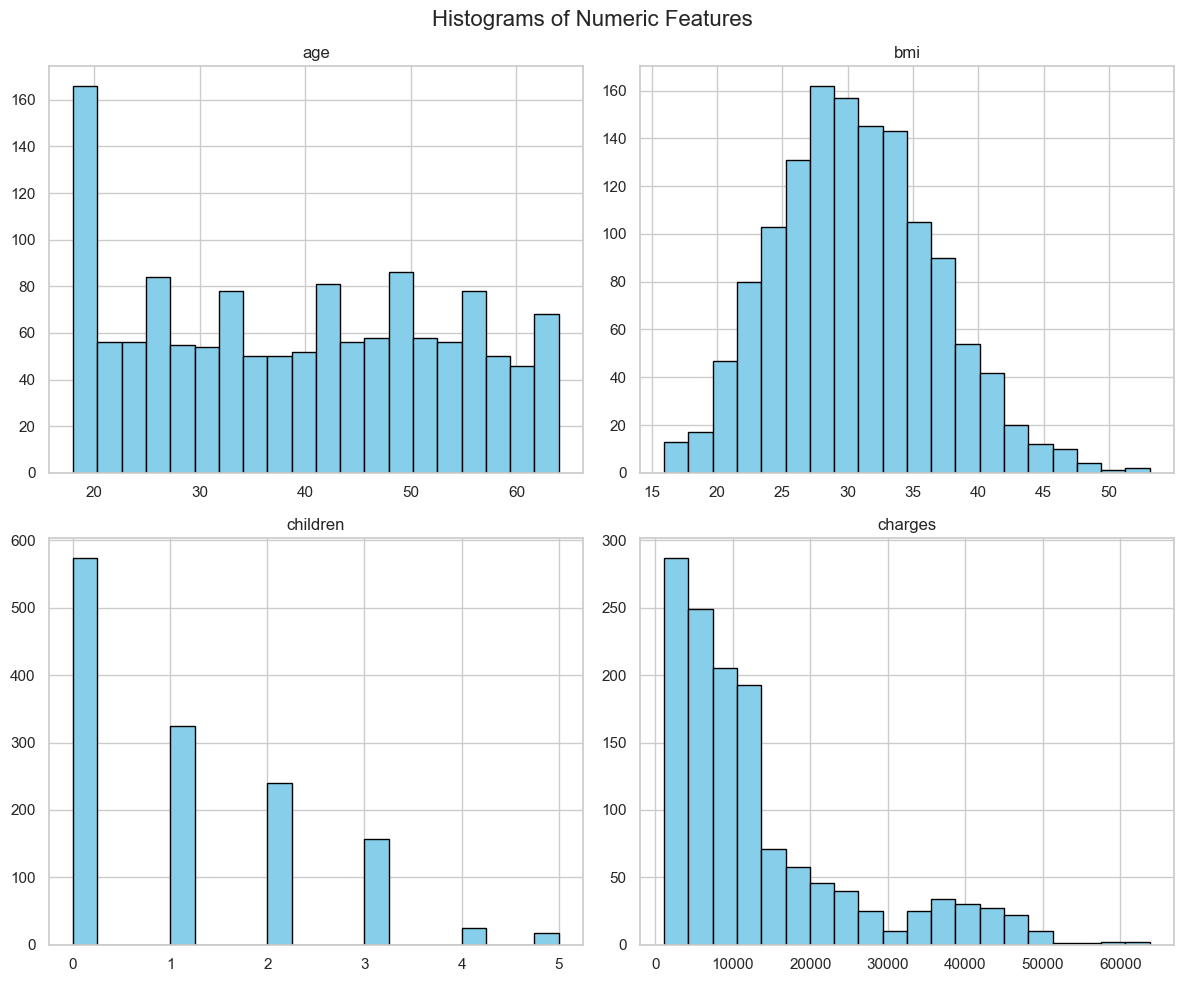

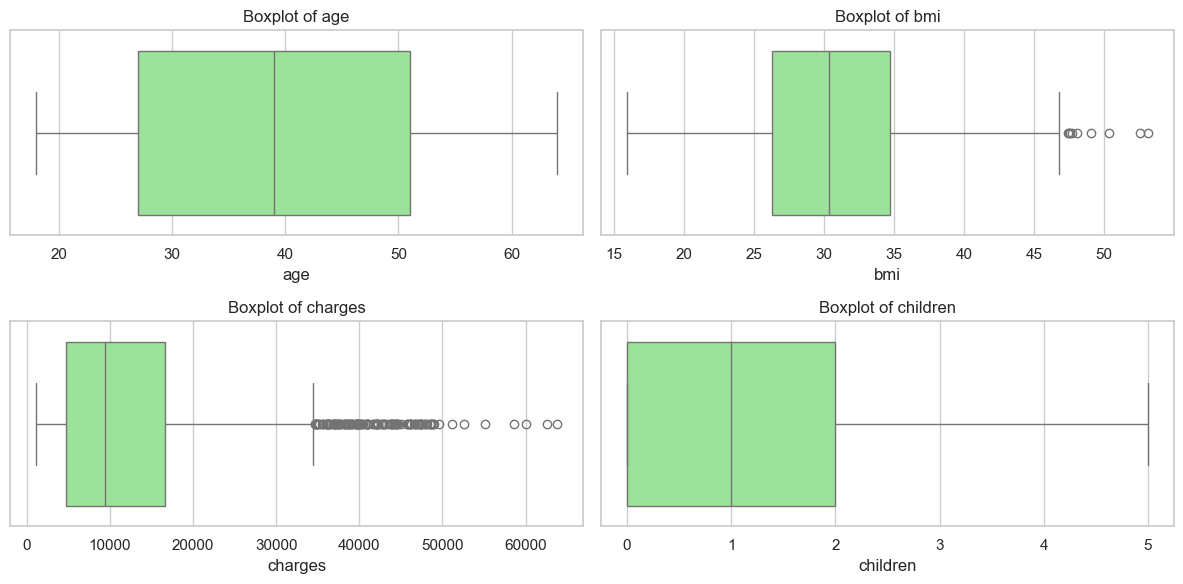

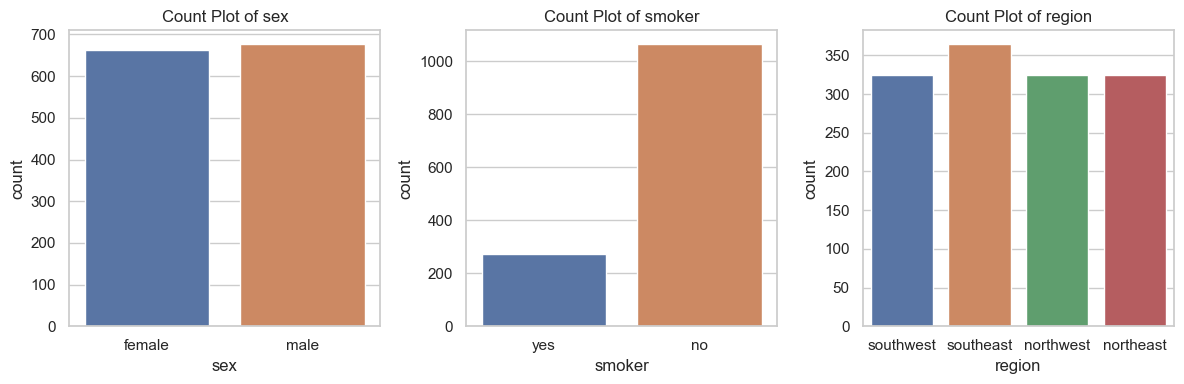

In [121]:
# 2.1 Explore data patterns and distributions
''' Create histograms, boxplots, and count plots for categorical variables (as applicable).
Identify patterns, outliers, and anomalies in feature distributions.
Check for class imbalance in the target variable (as applicable).'''

# Set plot style
sns.set_theme(style="whitegrid")

# Histogram for numeric variables
insurance_ds.hist(figsize=(12, 10), bins=20, color='skyblue', edgecolor='black')
plt.suptitle("Histograms of Numeric Features", fontsize=16)
plt.tight_layout()
plt.show()

# Boxplots to detect outliers
numeric_cols = ['age', 'bmi', 'charges', 'children']
plt.figure(figsize=(12, 6))
for i, col in enumerate(numeric_cols, 1):
    plt.subplot(2, 2, i)
    sns.boxplot(x=insurance_ds[col], color='lightgreen')
    plt.title(f'Boxplot of {col}')
plt.tight_layout()
plt.show()

# Count plots for categorical variables
categorical_cols = ['sex', 'smoker', 'region']
plt.figure(figsize=(12, 4))
for i, col in enumerate(categorical_cols, 1):
    plt.subplot(1, 3, i)
    sns.countplot(data=insurance_ds, x=col, palette='deep', hue=col)
    plt.title(f'Count Plot of {col}')
plt.tight_layout()
plt.show()




In [122]:
# 2.2 Handle missing values and clean data
''' Impute or drop missing values (as applicable).
Remove or transform outliers (as applicable).
Convert categorical data to numerical format using encoding (as applicable).'''

insurance_ds['sex'] = insurance_ds['sex'].map({'female': 0, 'male': 1})
insurance_ds['smoker'] = insurance_ds['smoker'].map({'no': 0, 'yes': 1})

# Convert categorical columns to numerical using encoding
# One-hot encode
insurance_ds = pd.get_dummies(insurance_ds, columns=['region'], drop_first=True, dtype=int)
print(insurance_ds.head(10))

# 2.3 Feature selection and engineering
''' Create new features (as applicable).
Transform or combine existing features to improve model performance (as applicable).
Scale or normalize data (as applicable).'''

def bmi_category(bmi):
    if bmi < 18.5:
        return 'underweight'
    elif bmi < 25:
        return 'normal'
    elif bmi < 30:
        return 'overweight'
    else:
        return 'obese'

insurance_ds['bmi_category'] = insurance_ds['bmi'].apply(bmi_category)

print(insurance_ds[['bmi', 'bmi_category']].head(10))





   age  sex     bmi  children  smoker      charges  region_northwest  \
0   19    0  27.900         0       1  16884.92400                 0   
1   18    1  33.770         1       0   1725.55230                 0   
2   28    1  33.000         3       0   4449.46200                 0   
3   33    1  22.705         0       0  21984.47061                 1   
4   32    1  28.880         0       0   3866.85520                 1   
5   31    0  25.740         0       0   3756.62160                 0   
6   46    0  33.440         1       0   8240.58960                 0   
7   37    0  27.740         3       0   7281.50560                 1   
8   37    1  29.830         2       0   6406.41070                 0   
9   60    0  25.840         0       0  28923.13692                 1   

   region_southeast  region_southwest  
0                 0                 1  
1                 1                 0  
2                 1                 0  
3                 0                 0  
4      

Reflection 2: What patterns or anomalies do you see? Do any features stand out? What preprocessing steps were necessary to clean and improve the data? Did you create or modify any features to improve performance?

I observed that age is fairly evenly distributed across the dataset. In contrast, the charges feature shows a significant number of outliers, indicating a wide range of insurance costs, possibly influenced by other factors like smoking status or BMI. One feature that particularly stands out is smoker, the majority of individuals in the dataset are non-smokers, which could play a key role in cost prediction. I applied encoding to convert categorical variables such as sex, smoker, and region into a numerical format, making them suitable for machine learning models. Additionally, I engineered a new feature called bmi_category, which groups individuals into categories like "underweight," "normal," "overweight," and "obese" based on their BMI values. This transformation helps capture health-related risk factors more intuitively and may enhance model performance.

## Section 3. Feature Selection and Justification

In [123]:
# 3.1 Choose features and target
''' Select two or more input features (numerical for regression, numerical and/or categorical for classification)
Select a target variable (as applicable)
Regression: Continuous target variable (e.g., price, temperature).
Classification: Categorical target variable (e.g., gender, species).
Clustering: No target variable.
Justify your selection with reasoning.'''

"""I selected charges as the target variable (y) because it is a continuous numerical value representing the insurance cost. 

The input features (X) I selected are:
bmi: Body Mass Index can be a strong indicator of health and risk factors that influence medical costs.
smoker: Smoking status is highly correlated with insurance charges, as smokers often face higher premiums.
age: Age typically impacts insurance pricing, with older individuals usually incurring higher costs.

These features were chosen based on their potential predictive power and relevance to healthcare expenses. """


# 3.2 Define X and y
''' Assign input features to X
Assign target variable to y (as applicable)'''

y = insurance_ds['charges']
X = insurance_ds[['bmi', 'age', 'smoker']]


Reflection 3: Why did you choose these features? How might they impact predictions or accuracy?

I selected charges as the target variable (y) because it is a continuous numerical value representing the insurance cost. 

The input features (X) I selected are:
bmi: Body Mass Index can be a strong indicator of health and risk factors that influence medical costs.
smoker: Smoking status is highly correlated with insurance charges, as smokers often face higher premiums.
age: Age typically impacts insurance pricing, with older individuals usually incurring higher costs.

These features were chosen based on their potential predictive power and relevance to healthcare expenses. 

## Section 4. Train a Model (Linear Regression)

In [124]:
# 4.1 Split the data into training and test sets using train_test_split (or StratifiedShuffleSplit if class imbalance is an issue).
X1_train, X1_test, y1_train, y1_test = train_test_split(X, y, test_size=0.2, random_state=123)


# 4.2 Train model using Scikit-Learn model.fit() method
lr_model1 = LinearRegression().fit(X1_train, y1_train)
y_pred_train1 = lr_model1.predict(X1_train)
y_pred_test1 = lr_model1.predict(X1_test)


# 4.3 Evalulate performance, for example:
''' Regression: R^2, MAE, RMSE (RMSE has been recently updated)
Classification: Accuracy, Precision, Recall, F1-score, Confusion Matrix
Clustering: Inertia, Silhouette Score'''
print("Case 1: Training R²:", r2_score(y1_train, y_pred_train1))
print("Case 1: Test R²:", r2_score(y1_test, y_pred_test1))
print("Case 1: Test RMSE:", root_mean_squared_error(y1_test, y_pred_test1))
print("Case 1: Test MAE:", mean_absolute_error(y1_test, y_pred_test1))
print()


Case 1: Training R²: 0.734346556959124
Case 1: Test R²: 0.7961131646662086
Case 1: Test RMSE: 5583.313504600935
Case 1: Test MAE: 4136.416352123491



Reflection 4: How well did the model perform? Any surprises in the results?

The model performed quite well overall. The Training R² of 0.73 and Test R² of 0.80 indicate that the model explains a large portion of the variance in the target variable (charges). It's encouraging that the Test R² is slightly higher than the Training R², which suggests the model generalizes well and is not overfitting.

The Root Mean Squared Error (RMSE) of ~5583 and Mean Absolute Error (MAE) of ~4136 are reasonable given the scale of the charges data, though there’s still room for improvement in precision. The relatively close values between training and test metrics are a good sign of a consistent and reliable model.

There weren't any major surprises, but the performance reinforces that features like age, BMI, and smoking status are strong predictors of insurance charges. Introducing interaction terms or exploring polynomial features might help capture non-linear relationships and further improve accuracy.

## Section 5. Improve the Model or Try Alternates (Implement Pipelines)

In [125]:
# 5.1 Implement Pipeline 1: Imputer → StandardScaler → Linear Regression.
# Pipeline 1
pipeline1 = Pipeline([
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler()),
    ('regressor', LinearRegression())
])

pipeline1.fit(X1_train, y1_train)
y1_pred = pipeline1.predict(X1_test)

r2_1 = r2_score(y1_test, y1_pred)
rmse_1 = root_mean_squared_error(y1_test, y1_pred)
mae_1 = mean_absolute_error(y1_test, y1_pred)

# 5.2 Implement Pipeline 2: Imputer → Polynomial Features (degree=3) → StandardScaler → Linear Regression.
# Pipeline 2
pipeline2 = Pipeline([
    ('imputer', SimpleImputer(strategy='mean')),
    ('poly', PolynomialFeatures(degree=3)),
    ('scaler', StandardScaler()),
    ('regressor', LinearRegression())
])

pipeline2.fit(X1_train, y1_train)
y2_pred = pipeline2.predict(X1_test)

r2_2 = r2_score(y1_test, y2_pred)
rmse_2 = root_mean_squared_error(y1_test, y2_pred)
mae_2 = mean_absolute_error(y1_test, y2_pred)

# 5.3 Compare performance of all models across the same performance metrics
print("Pipeline 1 (Linear Regression)")
print(f"R²: {r2_1}")
print(f"RMSE: {rmse_1}")
print(f"MAE: {mae_1}\n")

print("Pipeline 2 (Polynomial Regression, degree=3)")
print(f"R²: {r2_2}")
print(f"RMSE: {rmse_2}")
print(f"MAE: {mae_2}")

Pipeline 1 (Linear Regression)
R²: 0.7961131646662084
RMSE: 5583.313504600937
MAE: 4136.416352123505

Pipeline 2 (Polynomial Regression, degree=3)
R²: 0.9031681583348345
RMSE: 3847.747084278581
MAE: 2563.739243743308


Reflection 5: Which models performed better? How does scaling impact results?

Between the two models, Pipeline 2 (Polynomial Regression with degree=3) performed better than Pipeline 1 (Linear Regression). It achieved a significantly higher R2 score of 0.90, indicating that it explained more variance in the target variable. Additionally, both the RMSE and MAE were lower in Pipeline 2, meaning the predictions were generally closer to the actual values. This improvement can be attributed to the fact that Polynomial Regression is better at capturing nonlinear relationships in the data, which a simple Linear Regression model might miss.

Scaling played a crucial role in both pipelines. Without scaling, features with larger numeric ranges could dominate the model and lead to poor performance. By applying standard scaling, it ensured that each feature contributed equally, improving both model convergence and accuracy.

## Section 6. Final Thoughts & Insights

### 6.1 Summarize findings.
The analysis and model implementation highlighted the importance of feature engineering and preprocessing. By implementing two different pipelines, we observed that Polynomial Regression (degree=3) outperformed Linear Regression, as indicated by its higher R2 (0.90) and lower RMSE and MAE. Scaling the data through StandardScaler helped standardize the input features, leading to better model performance by treating all features equally. In particular, Polynomial Regression demonstrated its strength in capturing non-linear relationships, providing a more accurate representation of the data.


### 6.2 Discuss challenges faced.
One of the main challenges was dealing with data preprocessing, especially handling missing values and ensuring that categorical data was appropriately encoded. At times, there were inconsistencies with how categorical columns were treated, leading to errors during encoding, but these were resolved with proper data inspection and encoding techniques.


### 6.3 If you had more time, what would you try next?
I would run the models using other features or explore other models, such as Random Forests or Gradient Boosting, which might capture non-linear relationships even more effectively than polynomial features.


Reflection 6: What did you learn from this project?

I learned that machine learning is an iterative process and it's not just about training the model, but also about refining the data and continually experimenting with different approaches to improve predictions.

Tasks to Complete the Assignment